# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-03-30 13:50:08--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-03-30 13:50:09--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

c

In [ ]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [ ]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


Ninguna variable presenta problemas

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [ ]:

df['ValorT'] = df['quantity'] * df['price']

df.ValorT.head()
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,ValorT
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ValorT'}>]], dtype=object)

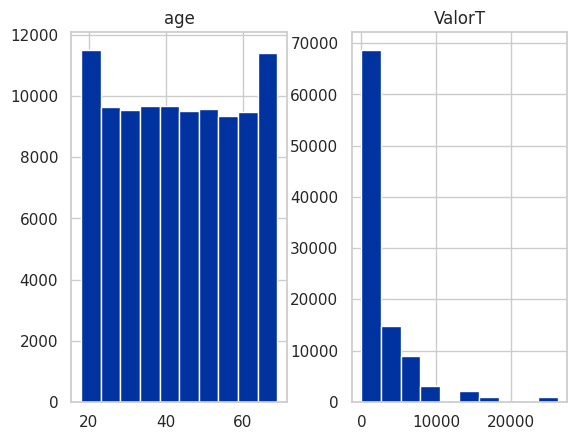

In [ ]:

df.hist(column=['age', 'ValorT'])

<Axes: >

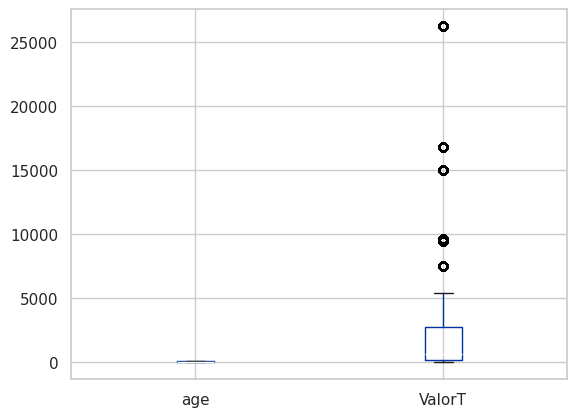

In [ ]:
df.boxplot(column=['age', 'ValorT'])

Las personas más jóvenes y las mayores tienden a realizar más compras, mientras que el boxplot indica que los datos presentan poca variación.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [ ]:
bins_edad = [0, 35, 55, 120]
labels_edad = ['Joven', 'Adulto', 'Mayor']
df['Segmento_Edad'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad)

df["Segmento_Edad"].value_counts()

,count
Segmento_Edad,
Adulto,38452
Joven,34418
Mayor,26587


<ipython-input-12-56a8cacba33a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmento_df = df.groupby(['Segmento_Edad', 'gender'])['customer_id'].nunique().reset_index()


  Segmento_Edad  gender  Cantidad_Clientes
0         Joven  Female              20492
1         Joven    Male              13926
2        Adulto  Female              23096
3        Adulto    Male              15356
4         Mayor  Female              15894
5         Mayor    Male              10693


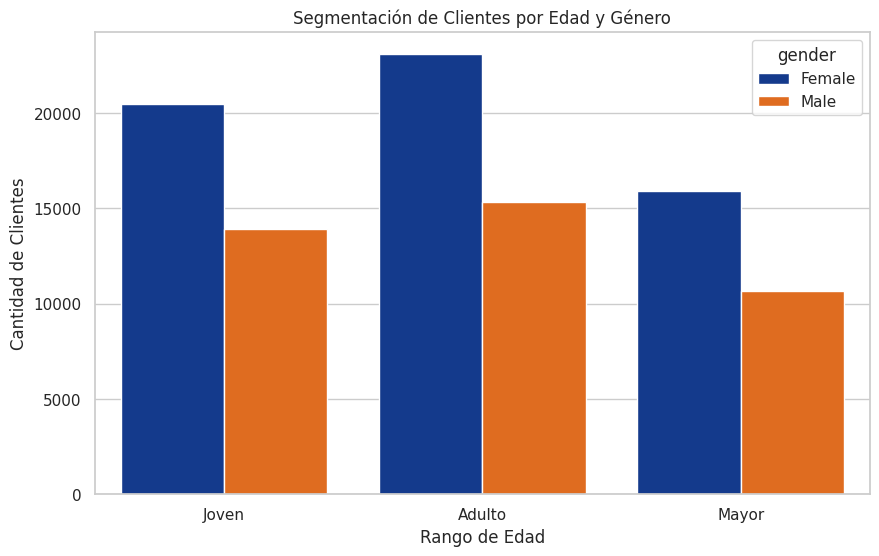

In [ ]:

segmento_df = df.groupby(['Segmento_Edad', 'gender'])['customer_id'].nunique().reset_index()
segmento_df = segmento_df.rename(columns={'customer_id': 'Cantidad_Clientes'})

print(segmento_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Segmento_Edad', y='Cantidad_Clientes', hue='gender', data=segmento_df)
plt.title('Segmentación de Clientes por Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

Cantidad de clientes por categoría de productos:
 category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: customer_id, dtype: int64


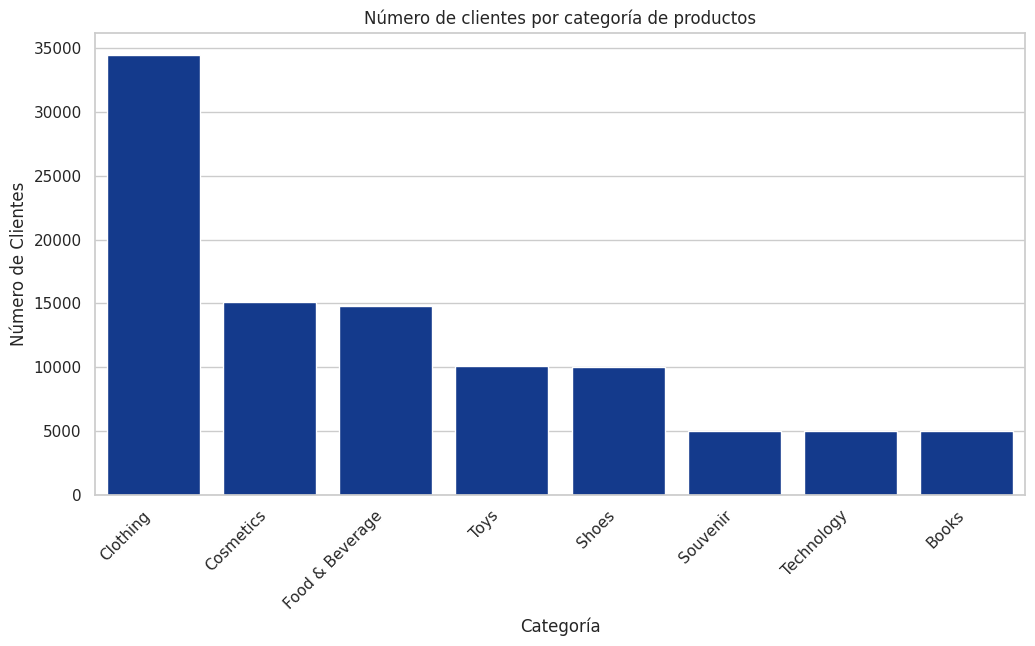

In [ ]:

# Análisis de comportamiento de compra por categoría
category_counts = df.groupby(['category'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por categoría de productos:\n", category_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Número de clientes por categoría de productos')
plt.xlabel('Categoría')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha="right")
plt.show()



Cantidad de clientes por método de pago:
 payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: customer_id, dtype: int64


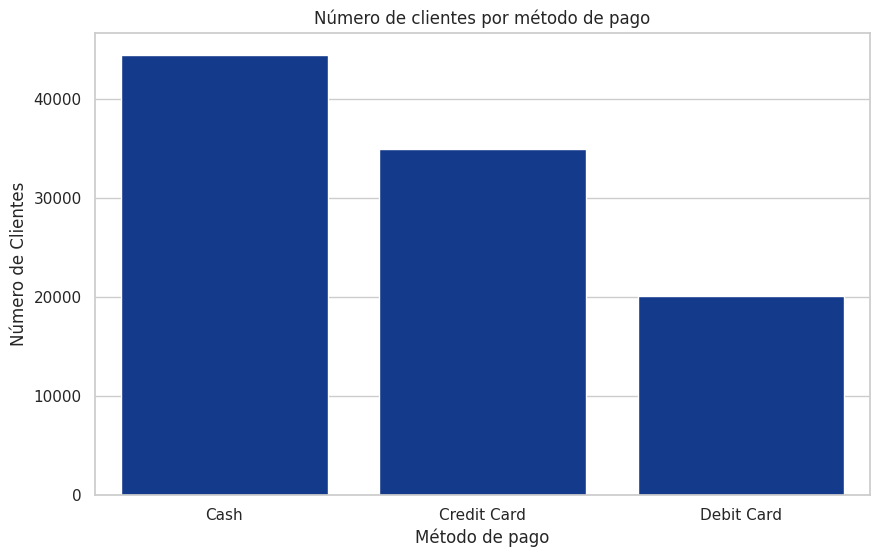

In [ ]:
# Análisis de comportamiento de compra por método de pago
payment_counts = df.groupby(['payment_method'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por método de pago:\n", payment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Número de clientes por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de Clientes')
plt.show()

Cantidad de clientes por centro comercial:
 shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: customer_id, dtype: int64


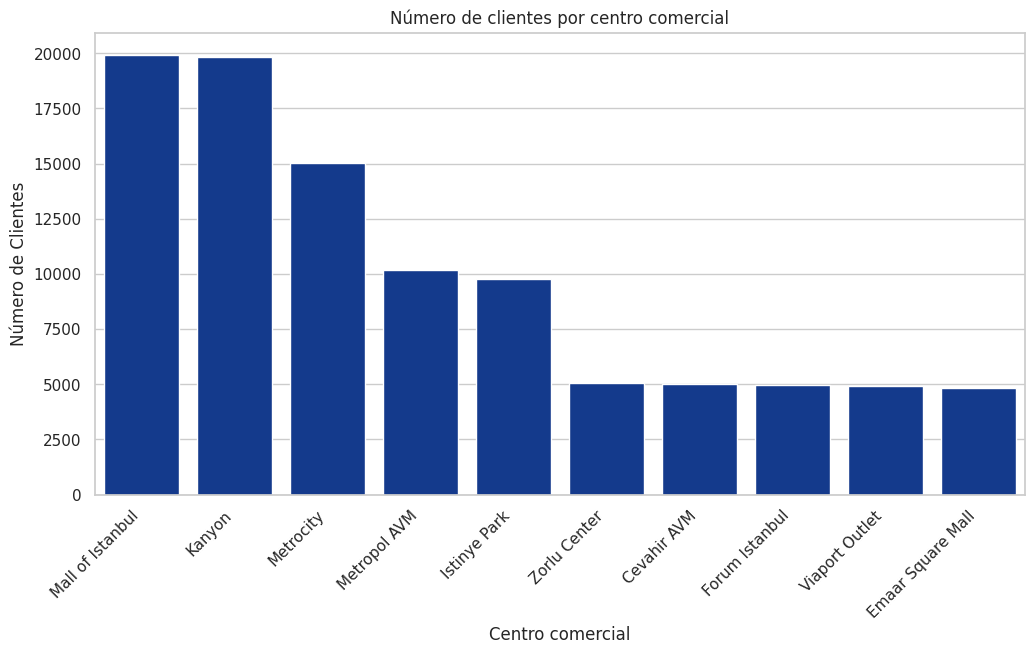

In [ ]:
# Análisis de comportamiento de compra por centro comercial
mall_counts = df.groupby(['shopping_mall'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por centro comercial:\n", mall_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=mall_counts.index, y=mall_counts.values)
plt.title('Número de clientes por centro comercial')
plt.xlabel('Centro comercial')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha="right")
plt.show()


Cantidad de clientes por categoría y método de pago:
 payment_method    Cash  Credit Card  Debit Card
category                                       
Books             2268         1696        1017
Clothing         15456        12025        7006
Cosmetics         6674         5336        3087
Food & Beverage   6587         5250        2939
Shoes             4474         3553        2007
Souvenir          2211         1770        1018
Technology        2235         1753        1008
Toys              4542         3548        1997


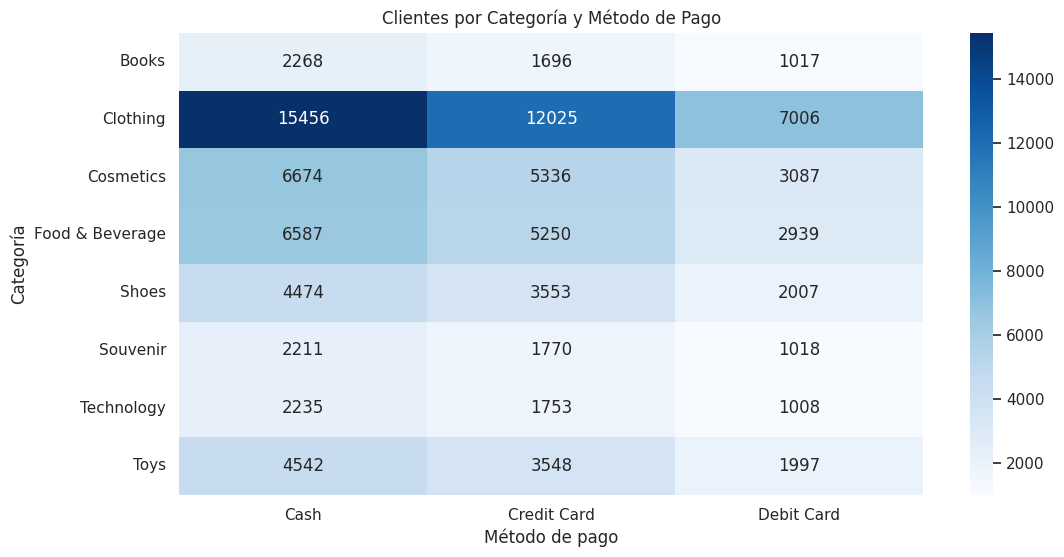

In [ ]:
# Análisis de comportamiento de compra por categoría y método de pago
category_payment_counts = df.groupby(['category', 'payment_method'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por categoría y método de pago:\n", category_payment_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(category_payment_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Categoría y Método de Pago')
plt.xlabel('Método de pago')
plt.ylabel('Categoría')
plt.show()

Cantidad de clientes por centro comercial y categoría:
 category           Books  Clothing  Cosmetics  Food & Beverage  Shoes  \
shopping_mall                                                           
Cevahir AVM          258      1729        732              772    490   
Emaar Square Mall    236      1651        760              692    498   
Forum Istanbul       252      1729        770              712    458   
Istinye Park         462      3353       1458             1490   1001   
Kanyon              1013      6840       3023             2909   2017   
Mall of Istanbul    1025      6923       3050             2957   2023   
Metrocity            752      5268       2265             2244   1457   
Metropol AVM         476      3525       1541             1517   1074   
Viaport Outlet       246      1708        734              733    497   
Zorlu Center         261      1761        764              750    519   

category           Souvenir  Technology  Toys  
shopping_mall      

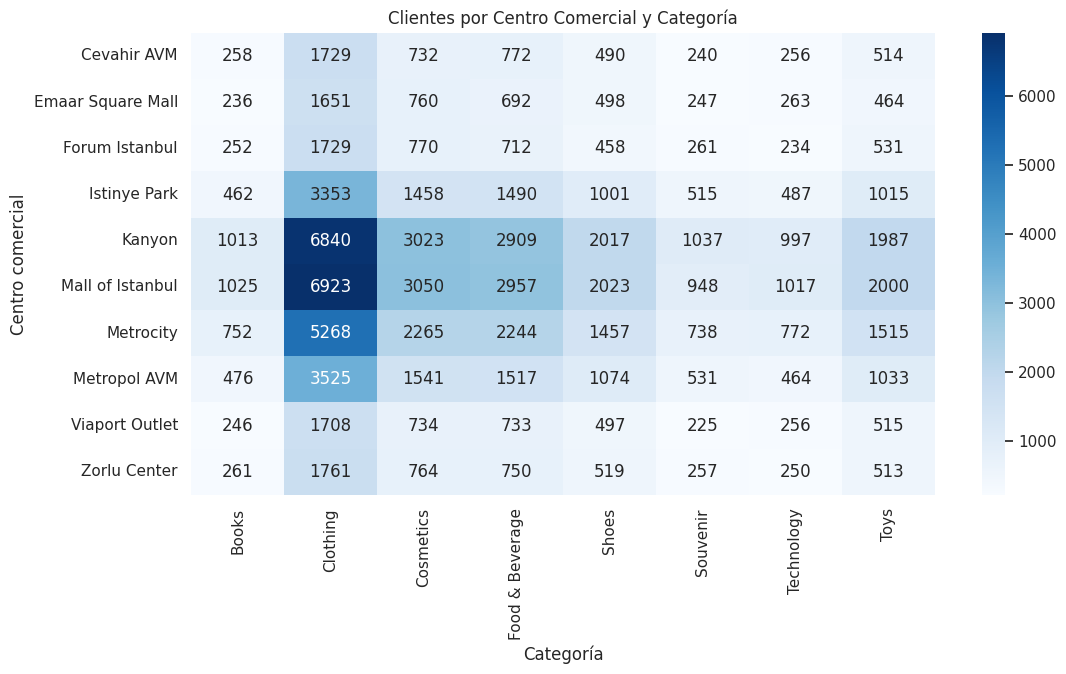

In [ ]:
# Análisis de comportamiento de compra por centro comercial y categoría
mall_category_counts = df.groupby(['shopping_mall', 'category'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por centro comercial y categoría:\n", mall_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(mall_category_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Centro Comercial y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Centro comercial')
plt.show()

La categoría de compra y el método de pago son factores clave, ya que permiten identificar los productos más atractivos para los consumidores y, al mismo tiempo, facilitan la implementación de campañas de incentivo enfocadas en las formas de pago utilizadas


## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

<ipython-input-39-978f64b2ff96>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = df.groupby(['Segmento_Edad', 'category'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y categoría:
 category       Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
Segmento_Edad                                                                 
Joven           1708     11951       5171             5126   3478      1738   
Adulto          1921     13320       5868             5715   3880      1894   
Mayor           1352      9216       4058             3935   2676      1367   

category       Technology  Toys  
Segmento_Edad                    
Joven                1713  3533  
Adulto               1982  3872  
Mayor                1301  2682  


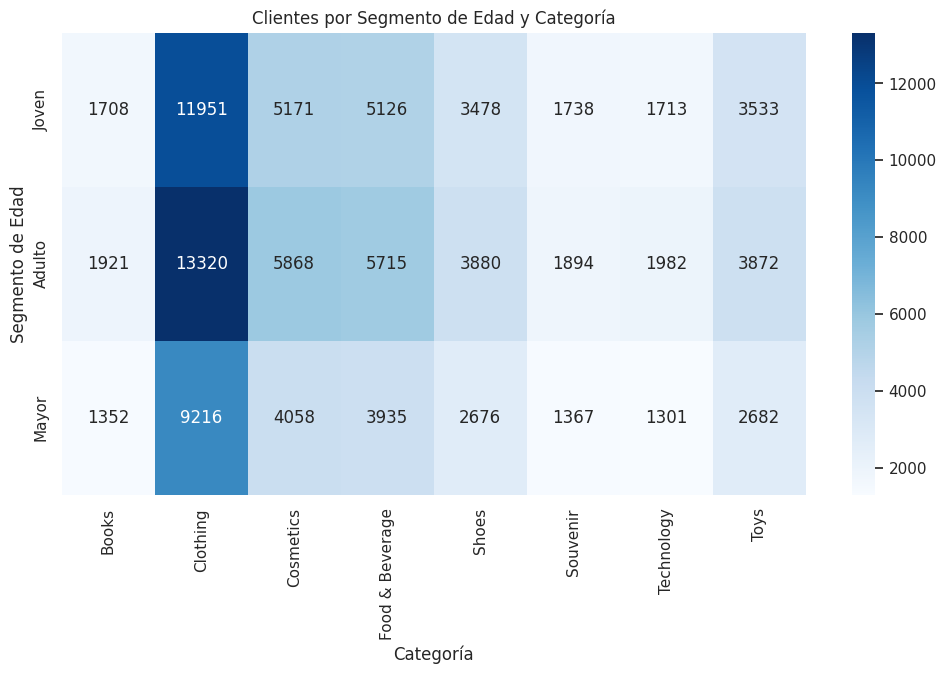

In [ ]:

# Agrupación por segmento de edad y categoría de producto
age_category_counts = df.groupby(['Segmento_Edad', 'category'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y categoría:\n", age_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_category_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Segmento de Edad y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Segmento de Edad')
plt.show()




<ipython-input-19-edae7fea29d4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_payment_counts = df.groupby(['Segmento_Edad', 'payment_method'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y método de pago:
 payment_method   Cash  Credit Card  Debit Card
Segmento_Edad                                 
Joven           15361        12075        6982
Adulto          17141        13536        7775
Mayor           11945         9320        5322


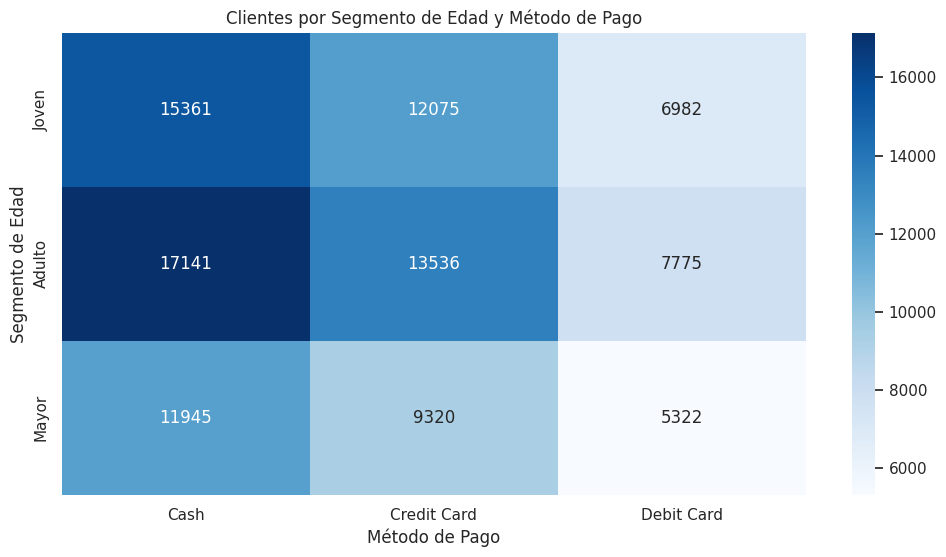

In [ ]:
# Agrupación por segmento de edad y método de pago
age_payment_counts = df.groupby(['Segmento_Edad', 'payment_method'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y método de pago:\n", age_payment_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_payment_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Segmento de Edad y Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Segmento de Edad')
plt.show()

Los segmentos de alto valor podrian ser los cloting que son los que mas consumen los de la categioria de adultos y su metodo de pago favorito es el efectivo

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

<ipython-input-20-ba1fcc7db2fb>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = df.groupby(['Segmento_Edad', 'Agrupa'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y categoría:
 Agrupa         Comida  Cosmeticos  Libros  Otros   Ropa  Zapatos
Segmento_Edad                                                   
Joven            5126        5171    1708   6984  11951     3478
Adulto           5715        5868    1921   7748  13320     3880
Mayor            3935        4058    1352   5350   9216     2676


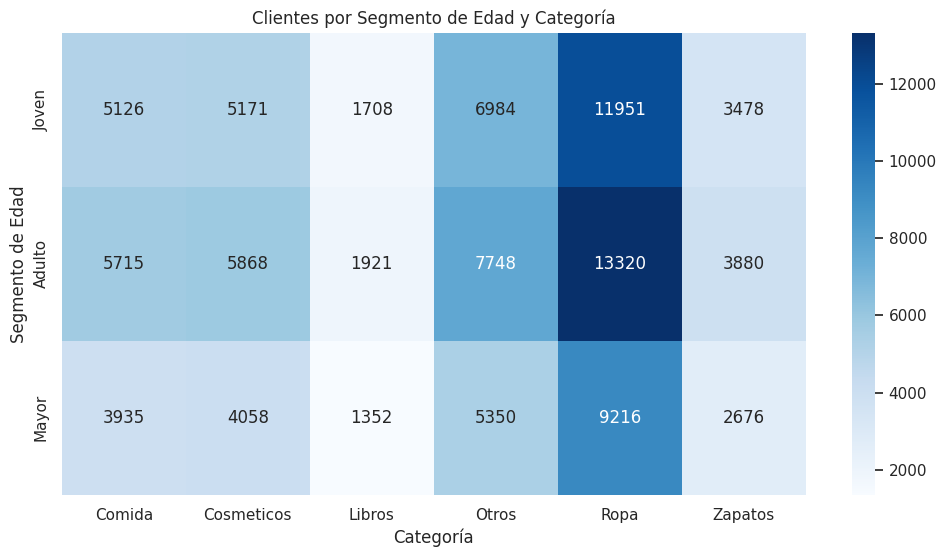

In [ ]:
df['Agrupa'] = df['category'].replace({
                  'Books': 'Libros',
                  'Clothing': 'Ropa',
                  'Cosmetics': 'Cosmeticos',
                  'Food & Beverage': 'Comida',
                  'Shoes': 'Zapatos',
                  'Souvenir': 'Otros',
                  'Technology': 'Otros',
                  'Toys': 'Otros',
                })
age_category_counts = df.groupby(['Segmento_Edad', 'Agrupa'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y categoría:\n", age_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_category_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Segmento de Edad y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Segmento de Edad')
plt.show()


Se agruparon suvenires , tecnologia y juguetes

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [ ]:
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['category']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Adulto_Clothing,13320
1,Joven_Clothing,11951
2,Mayor_Clothing,9216
3,Adulto_Cosmetics,5868
4,Adulto_Food & Beverage,5715
5,Joven_Cosmetics,5171
6,Joven_Food & Beverage,5126
7,Mayor_Cosmetics,4058
8,Mayor_Food & Beverage,3935
9,Adulto_Shoes,3880


Para una campaña de marketing efectiva, identifica la edad del publico y el producto que más consume, y enfoca la campaña segun la ubicación del negocio para optimizar los resultados

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Precio promedio por Segmento Combinado:
             Segmento_Comb  Precio_Promedio
0             Adulto_Books        45.181858
1          Adulto_Clothing       905.106162
2         Adulto_Cosmetics       122.506612
3   Adulto_Food & Beverage        15.698236
4             Adulto_Shoes      1813.348688
5          Adulto_Souvenir        34.267207
6        Adulto_Technology      3175.428860
7              Adulto_Toys       107.186777
8              Joven_Books        46.177342
9           Joven_Clothing       895.670126
10         Joven_Cosmetics       122.671951
11   Joven_Food & Beverage        15.690000
12             Joven_Shoes      1813.969822
13          Joven_Souvenir        35.561203
14        Joven_Technology      3092.381786
15              Joven_Toys       107.641732
16             Mayor_Books        45.349149
17          Mayor_Clothing       902.291328
18         Mayor_Cosmetics       122.080197
19   Mayor_Food & Beverage        15.610254
20             Mayor_Shoes      1790

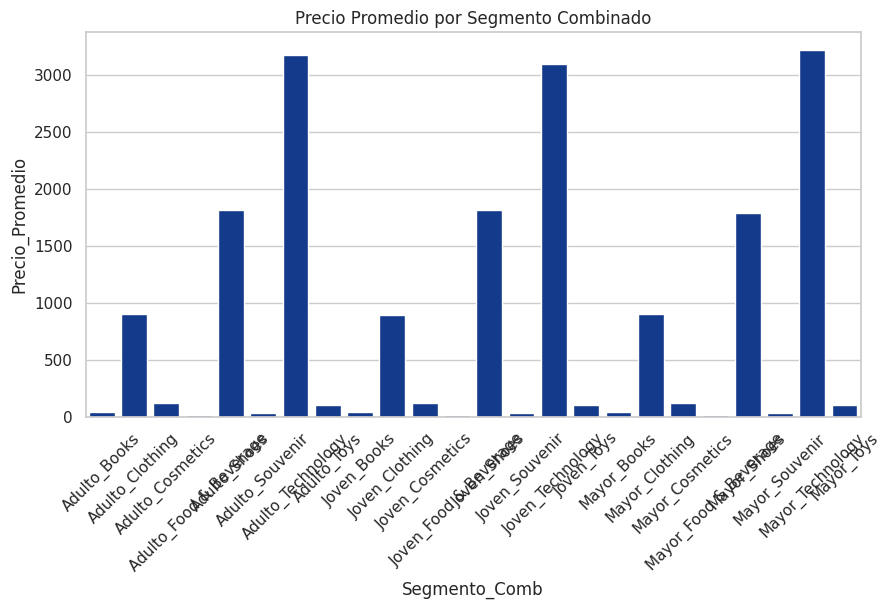

In [ ]:
promedio_segmentos = df.groupby('Segmento_Comb')['price'].mean().reset_index()
promedio_segmentos.columns = ['Segmento_Comb', 'Precio_Promedio']
print("Precio promedio por Segmento Combinado:")
print(promedio_segmentos)

plt.figure(figsize=(10,5))
sns.barplot(x='Segmento_Comb', y='Precio_Promedio', data=promedio_segmentos)
plt.title('Precio Promedio por Segmento Combinado')
plt.xticks(rotation=45)
plt.show()

Los souvenirs son los productos más comprados a precios elevados, particularmente por personas mayores. No obstante, esta misma categoría también presenta la mayor cantidad de productos con precios promedio, lo que podría indicar un mayor margen de beneficio.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

1) El segmento con mayor potencial es el de Souvenir, ya que son los que tienen en costo mas alto por lo tanto con mayor margen sin embargo el producto mas vendido es la ropa lo que genera mas volumen de ventas

2) Se podria generar estrategias de descuentos o cuestiones de personalizacion para generar mas interes en el producto, de igual forma se podria pensar en insentivos al equipo de ventas para ventar de ciertos productos

3) Nos indican como la ubicacion del local tienen a ayudar al numero de ventas asi como la categoria de los productos ayudando a tener una estrategia por categoria de producto mas eficioente en las zonas que mas se  quieren impulsar alguna de las mismas.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

1. La ropa genera el mayor volumen de ventas, lo que implica alta demanda y rotación de inventario, resultando en menores costos de almacenamiento y mayor margen por rotación en comparación con los souvenirs, que tienen mayor margen individual pero menor rotacion

2. Se propone personalizar los souvenirs para impulsar su compra y crear combos de regalo para los productos con menor salid

3. El análisis del histórico de ventas permitirá medir el impacto de la campaña en los compradores. Se sugiere utilizar KPIs de ventas y rotación de inventario, diferenciando la frecuencia de venta por sucursal